In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from imblearn import over_sampling

from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, make_scorer, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

get_ipython().system(' pip install shap')
import shap
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


[notice] A new release of pip available: 22.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name=1)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
df_dict = pd.read_excel('E Commerce Dataset.xlsx', sheet_name=0)
df_dict.columns = df_dict.iloc[0]
df_dict = df_dict[1:].reset_index()
df_dict[['Variable','Discerption']]

,Variable,Discerption
0,CustomerID,Unique customer ID
1,Churn,Churn Flag
2,Tenure,Tenure of customer in organization
3,PreferredLoginDevice,Preferred login device of customer
4,CityTier,City tier
5,WarehouseToHome,Distance in between warehouse to home of customer
6,PreferredPaymentMode,Preferred payment method of customer
7,Gender,Gender of customer
8,HourSpendOnApp,Number of hours spend on mobile application or...
9,NumberOfDeviceRegistered,Total number of deceives is registered on part...


# 1. EDA

In [5]:
# def summary(text, df):
#     print(f'{text} shape: {df.shape}')
#     summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
#     summ['null'] = df.isnull().sum()
#     summ['unique'] = df.nunique()
#     summ['min'] = df.min()
#     summ['median'] = df.median()
#     summ['max'] = df.max()
#     summ['mean'] = df.mean()
#     summ['std'] = df.std()
#     return summ

# import pandas as pd

def summary(text, df):
    print(f'{text} shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['null'] = df.isnull().sum()
    summ['unique'] = df.nunique()
    summ['min'] = df.min()
    
    # Handle only numeric columns for median, max, mean, and std
    numeric_columns = df.select_dtypes(include=['number']).columns
    summ['median'] = df[numeric_columns].median()
    summ['max'] = df[numeric_columns].max()
    summ['mean'] = df[numeric_columns].mean()
    summ['std'] = df[numeric_columns].std()
    
    return summ

# Assuming df is your DataFrame
summary_result = summary('data', df)


data shape: (5630, 20)


In [6]:
summary('data',df)

data shape: (5630, 20)


,dtypes,null,unique,min,median,max,mean,std
CustomerID,int64,0,5630,50001,52815.50,55630.00,52815.500000,1625.385339
Churn,int64,0,2,0,0.00,1.00,0.168384,0.374240
Tenure,float64,264,36,0.0,9.00,61.00,10.189899,8.557241
PreferredLoginDevice,object,0,3,Computer,NaN,NaN,NaN,NaN
CityTier,int64,0,3,1,1.00,3.00,1.654707,0.915389
WarehouseToHome,float64,251,34,5.0,14.00,127.00,15.639896,8.531475
PreferredPaymentMode,object,0,7,CC,NaN,NaN,NaN,NaN
Gender,object,0,2,Female,NaN,NaN,NaN,NaN
HourSpendOnApp,float64,255,6,0.0,3.00,5.00,2.931535,0.721926
NumberOfDeviceRegistered,int64,0,6,1,4.00,6.00,3.688988,1.023999


In [7]:
cats= ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
ordinal = ['CityTier', 'SatisfactionScore']
binary = ['Churn', 'Complain']
nums = df.loc[:, ~df.columns.isin(cats + binary + ordinal)].columns[1:]

In [8]:
df[cats].describe().T

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [9]:
for col in cats:
    vc = df[col].value_counts().rename_axis(col).reset_index(name='Counts')
    display(vc)

,PreferredLoginDevice,Counts
0,Mobile Phone,2765
1,Computer,1634
2,Phone,1231


,PreferredPaymentMode,Counts
0,Debit Card,2314
1,Credit Card,1501
2,E wallet,614
3,UPI,414
4,COD,365
5,CC,273
6,Cash on Delivery,149


,Gender,Counts
0,Male,3384
1,Female,2246


,PreferedOrderCat,Counts
0,Laptop & Accessory,2050
1,Mobile Phone,1271
2,Fashion,826
3,Mobile,809
4,Grocery,410
5,Others,264


,MaritalStatus,Counts
0,Married,2986
1,Single,1796
2,Divorced,848


## Univariate Analysis

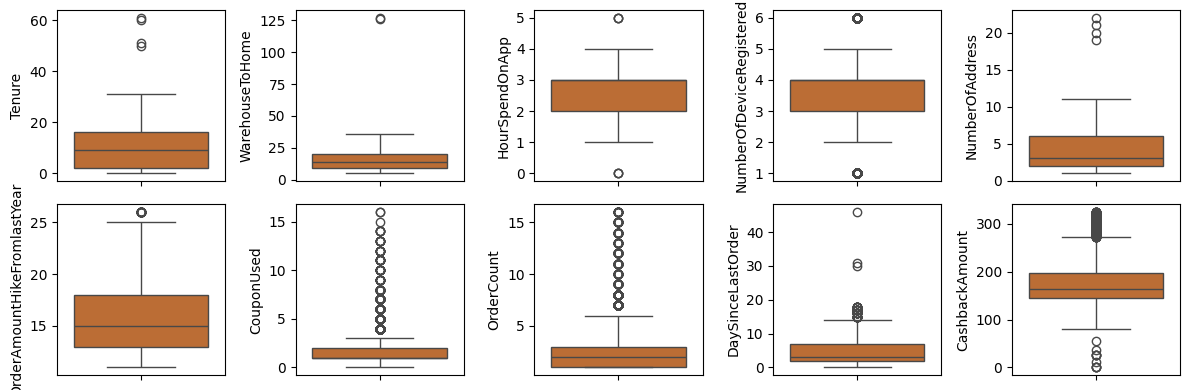

In [10]:
plt.figure(figsize=(12,4))
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='chocolate')
    plt.tight_layout()

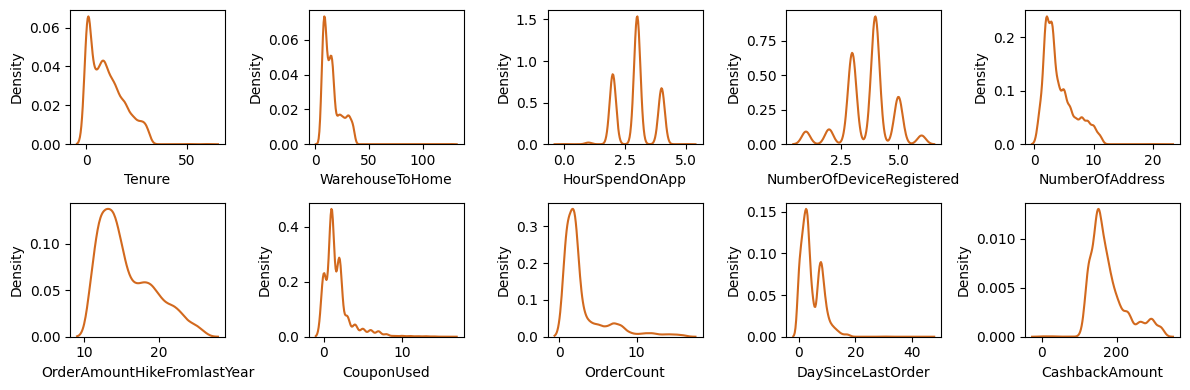

In [11]:
plt.figure(figsize=(12,4))
for i in range(0, len(nums)):
    plt.subplot(2,5,i+1)
    sns.kdeplot(x=df[nums[i]], color='chocolate')
    plt.tight_layout()

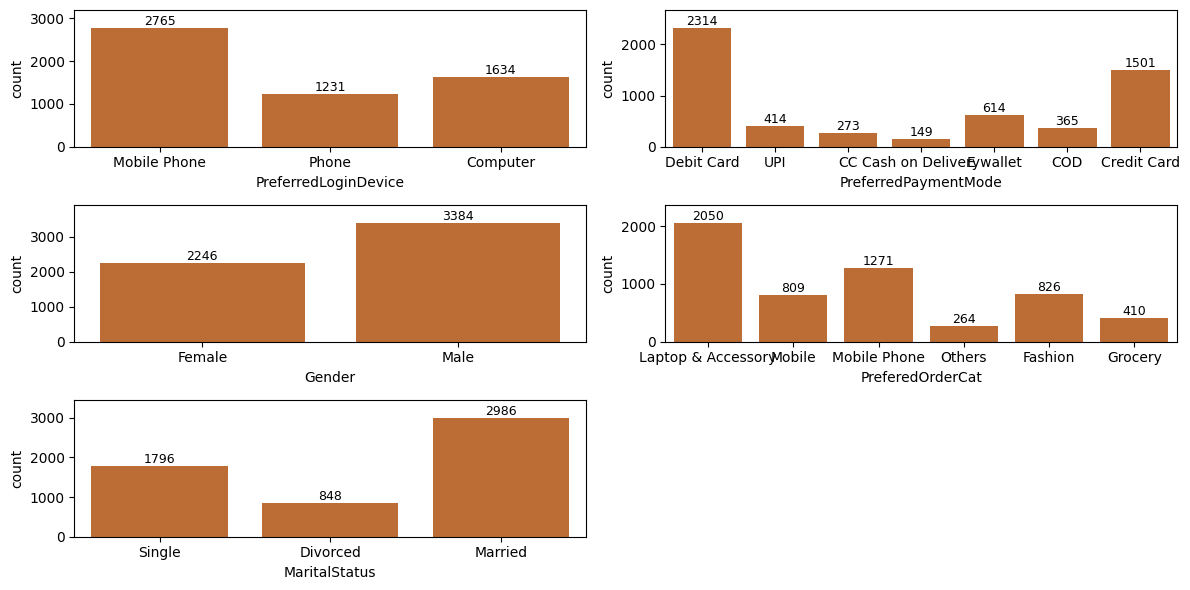

In [12]:
plt.figure(figsize=(12,6))
for i in range(0, len(cats)):
    plt.subplot(3, 2, i+1)
    ax = sns.countplot(x=df[cats[i]], color='chocolate')
    plt.tight_layout()
    for container in ax.containers:
        ax.bar_label(container, fontsize=9, fmt='%.f')
        ax.set_ylim(top = ax.get_ylim()[1]*1.1)

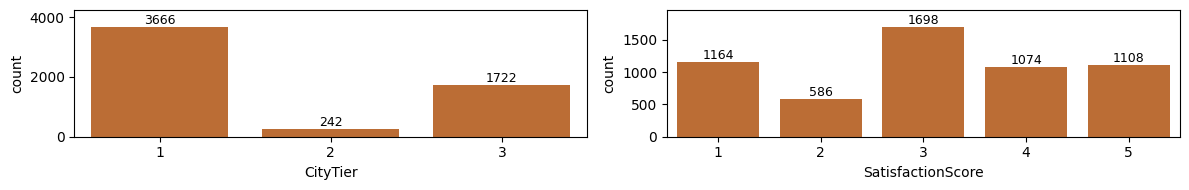

In [13]:
plt.figure(figsize=(12,2))
for i in range(0, len(ordinal)):
    plt.subplot(1, 2, i+1)
    ax = sns.countplot(x=df[ordinal[i]], color='chocolate')
    plt.tight_layout()
    for container in ax.containers:
        ax.bar_label(container, fontsize=9, fmt='%.f')
        ax.set_ylim(top = ax.get_ylim()[1]*1.1)

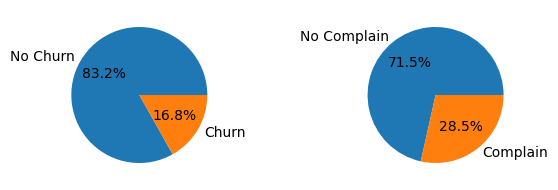

In [14]:
plt.figure(figsize=(12,2))
cats_bin = cats[4:]
for i in range(0, len(binary)):
    plt.subplot(1,4,i+1)
    data=df[binary[i]].value_counts()
    labels = [f'No {binary[i]}', f'{binary[i]}']
    plt.pie(data,labels=labels,autopct='%.1f%%')
    plt.tight_layout()

## Multivariate Analysis

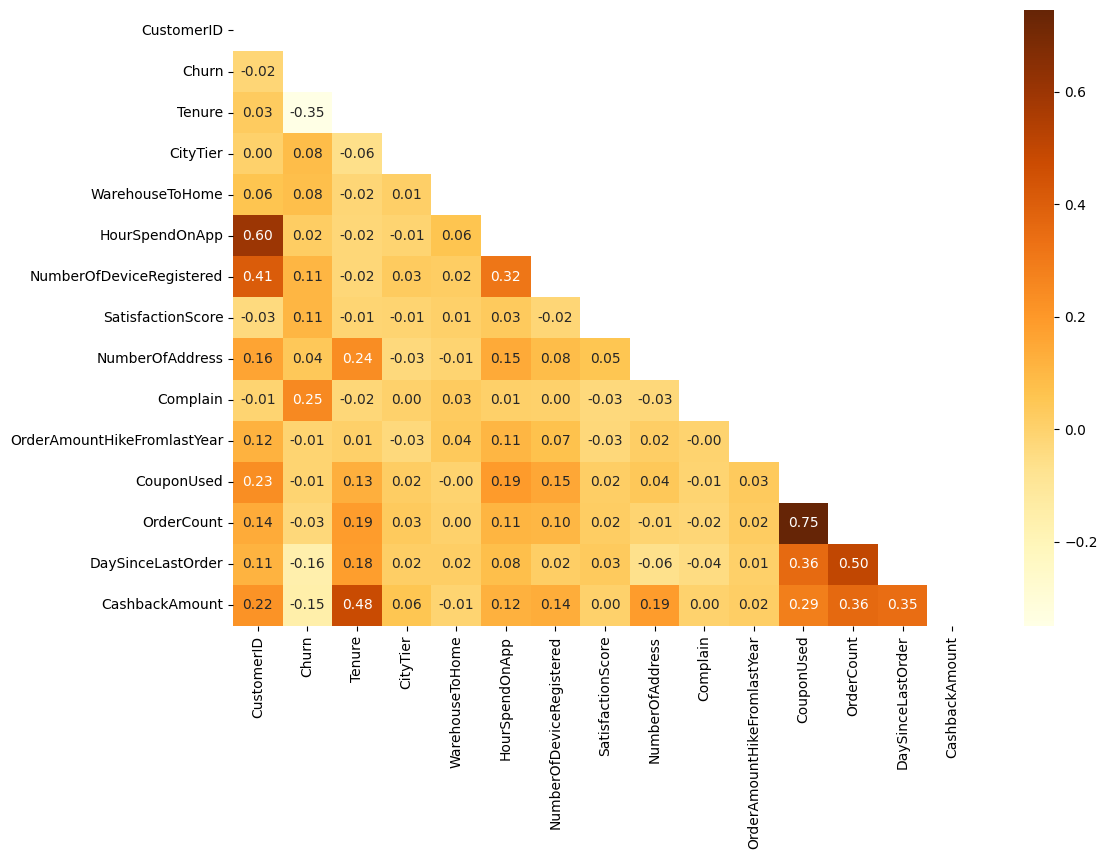

In [15]:

# plt.figure(figsize=(12,8))
# mask = np.triu(np.ones_like(df.corr()))
# sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.2f', cmap='YlOrBr')

numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='YlOrBr')
plt.show()

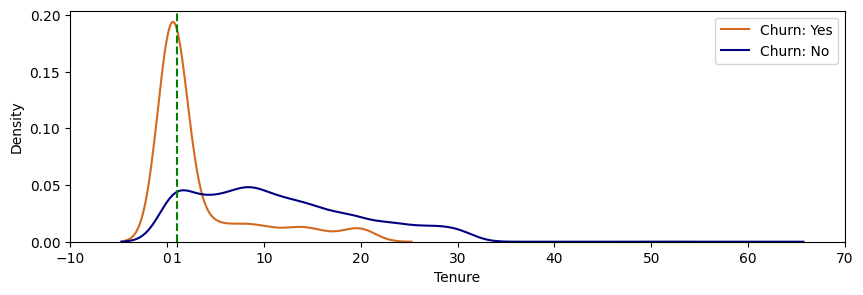

In [16]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.kdeplot(df[df['Churn'] == 1]['Tenure'].dropna(), color= 'chocolate', label= 'Churn: Yes', ax=ax)
sns.kdeplot(df[df['Churn'] == 0]['Tenure'].dropna(), color= 'navy', label= 'Churn: No', ax=ax)
plt.axvline(x=1, ls='--', color='green')
x_ticks = np.append(ax.get_xticks(), 1)
ax.set_xticks(x_ticks)
plt.legend(loc = 1)

In [17]:
def churn_plot(x, data):
    df_cats = data.copy()
    df_city = df_cats.groupby(x)['CustomerID'].nunique().reset_index(name='Total')
    df_churn =  df_cats.groupby([x, 'Churn'])['CustomerID'].nunique().reset_index(name='TotalCustomer')
    df_merge = df_churn.merge(df_city, on=x)
    df_merge['Percentage'] = round(df_merge['TotalCustomer']/df_merge['Total']*100,2)

    return df_merge

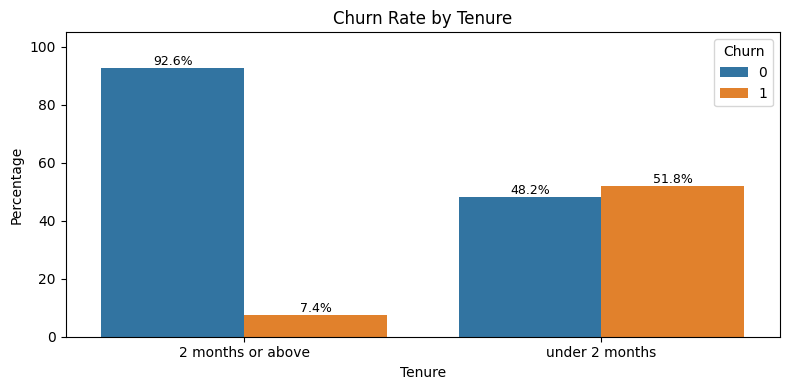

In [18]:
def segment(df):
    if df['Tenure'] < 2:
        return 'under 2 months'
    else:
        return '2 months or above'

df_tenure = df.copy()
df_tenure['Tenure'] = df_tenure.apply(lambda x: segment(x), axis=1)

plt.figure(figsize=(8,4))
data = churn_plot('Tenure', df_tenure)
ax = sns.barplot(x='Tenure', y='Percentage', data=data, hue = 'Churn')
ax.set_title('Churn Rate by Tenure')

for container in ax.containers:
    ax.bar_label(container, fontsize=9, fmt='%.1f%%')
    ax.set_ylim(top=105)
    ax.legend(loc=1, title='Churn')
plt.tight_layout()

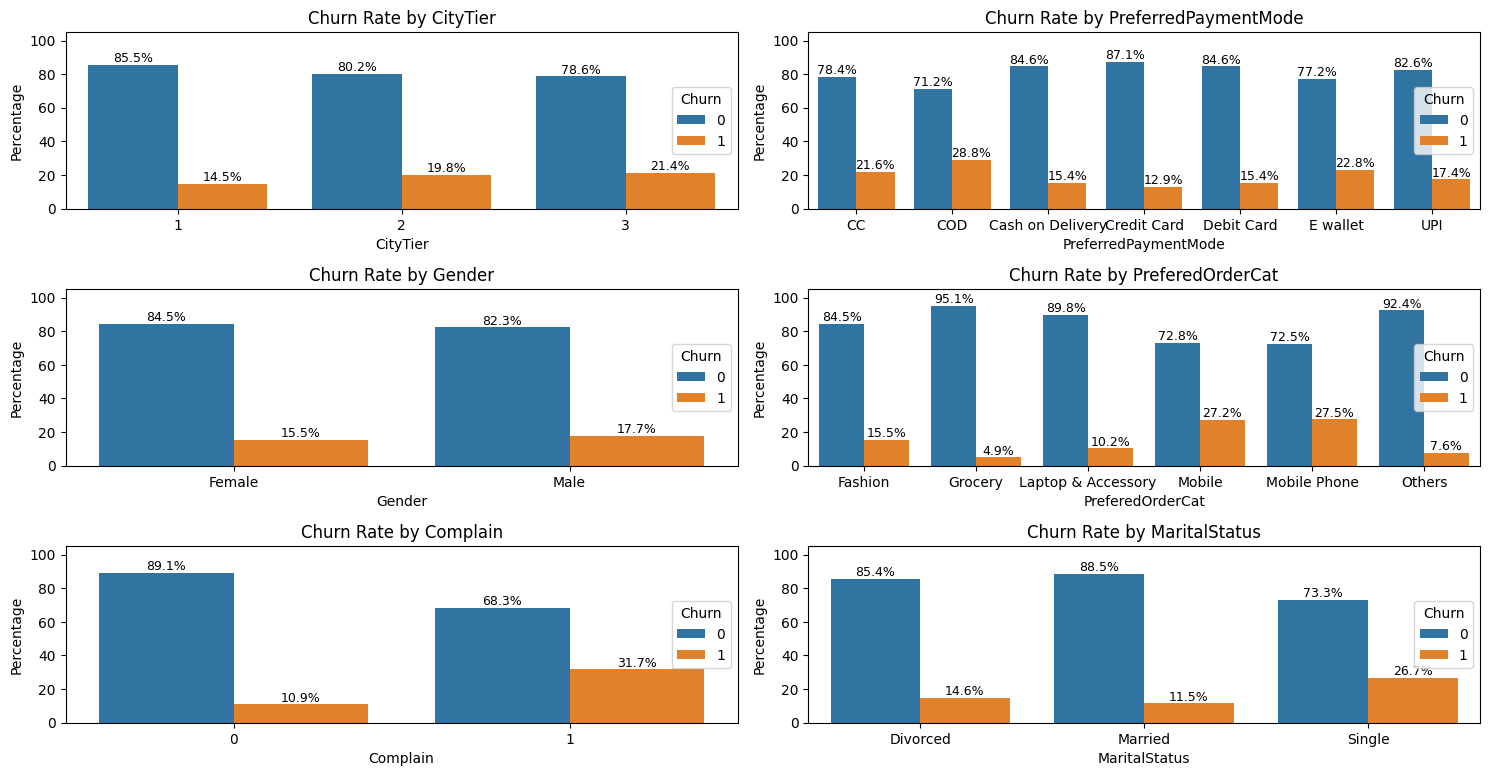

In [19]:
kolom = ['CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'Complain', 'MaritalStatus']
plt.figure(figsize=(15,10))
for i in range(0, len(kolom)):
    plt.subplot(4, 2, i+1)
    data = churn_plot(kolom[i], df)
    ax = sns.barplot(x=kolom[i], y='Percentage', data=data, hue = 'Churn')
    ax.set_title(f'Churn Rate by {kolom[i]}')

    for container in ax.containers:
        ax.bar_label(container, fontsize=9, fmt='%.1f%%')
        ax.set_ylim(top=105)
        ax.legend(loc='center right', title='Churn')
    plt.tight_layout()

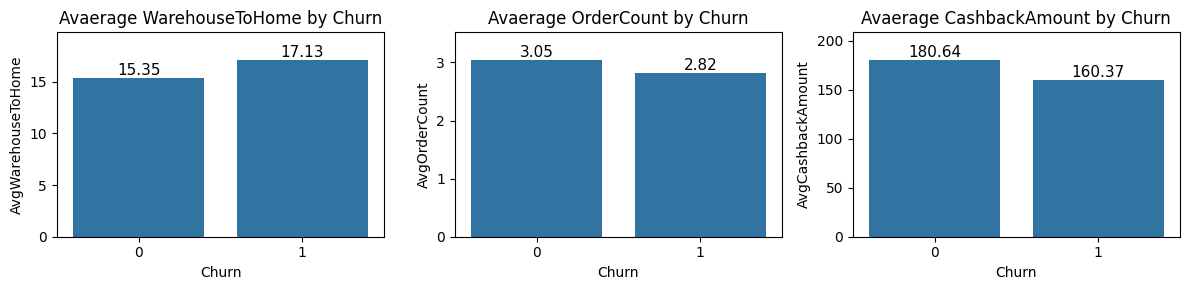

In [20]:
kolom = ['WarehouseToHome', 'OrderCount', 'CashbackAmount']
plt.figure(figsize=(12,3))
for i in range(0, len(kolom)):
    plt.subplot(1, 3, i+1)
    data = df.copy()
    data = data.groupby('Churn')[kolom[i]].mean().reset_index(name='Avg'+ kolom[i])
    ax = sns.barplot(x='Churn', y='Avg'+kolom[i], data=data)

    for container in ax.containers:
        ax.bar_label(container, fontsize=11, fmt='%.2f')
        ax.set_ylim(top=ax.get_ylim()[1]*1.1)
        ax.set_title(f'Avaerage {kolom[i]} by Churn')
    plt.tight_layout()

# 2. Preprocessing

## Missing Values

In [21]:
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median(), inplace=True)

## Outliers

In [22]:
print(f'before: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries

df = df[filtered_entries]

print(f'after: {len(df)}')

before: 5630
after: 5350


## Duplicated Data

In [23]:
df.duplicated(subset=['CustomerID']).sum()

0

## Feature Encoding

### Label Encoding

In [24]:
df['Gender'] = df['Gender'].replace(['Female','Male'], [0, 1])
df['MaritalStatus'] = df['MaritalStatus'].replace(['Divorced'], ['Single'])
df['MaritalStatus'] = df['MaritalStatus'].replace(['Single','Married'], [0, 1])

### One Hot Encoding

In [25]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace(['Phone','Mobile Phone'], ['Handphone', 'Handphone'])
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(['CC','COD'], ['Credit Card','Cash on Delivery'])
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace(['Mobile','Mobile Phone', 'Laptop & Accessory'], ['Electronics', 'Electronics', 'Electronics'])

In [26]:
df = pd.get_dummies(df)
df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Handphone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Electronics,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Others
0,50001,1,4.0,3,6.0,0,3.0,3,2,0,9,1,11.0,1.0,1.0,5.0,159.93,False,True,False,False,True,False,False,True,False,False,False
1,50002,1,9.0,1,8.0,1,3.0,4,3,0,7,1,15.0,0.0,1.0,0.0,120.90,False,True,False,False,False,False,True,True,False,False,False
2,50003,1,9.0,1,30.0,1,2.0,4,3,0,6,1,14.0,0.0,1.0,3.0,120.28,False,True,False,False,True,False,False,True,False,False,False
3,50004,1,0.0,3,15.0,1,2.0,4,5,0,8,0,23.0,0.0,1.0,3.0,134.07,False,True,False,False,True,False,False,True,False,False,False
4,50005,1,0.0,1,12.0,1,3.0,3,5,0,3,0,11.0,1.0,1.0,3.0,129.60,False,True,False,True,False,False,False,True,False,False,False


## Feature Engineering

In [27]:
df['AvgCashback'] = df['CashbackAmount'] / df['OrderCount']

### Feature Transformation

In [28]:
column = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
          'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed',
          'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'AvgCashback']
for col in column:
    df[col] = StandardScaler().fit_transform(df[col].values.reshape(len(df),1))

In [29]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,AvgCashback
count,5350.000000,5350.000000,5.350000e+03,5.350000e+03,5.350000e+03,5350.000000,5.350000e+03,5.350000e+03,5.350000e+03,5350.000000,5.350000e+03,5350.000000,5.350000e+03,5.350000e+03,5.350000e+03,5.350000e+03,5.350000e+03,5.350000e+03
mean,52802.826168,0.170467,7.171833e-17,-2.473618e-17,7.437457e-17,0.600748,-8.499950e-17,-8.499950e-17,1.726552e-16,0.528037,2.124988e-17,0.286355,9.562444e-17,-8.499950e-17,1.062494e-16,4.249975e-17,5.099970e-16,1.699990e-16
std,1627.280475,0.376078,1.000093e+00,1.000093e+00,1.000093e+00,0.489791,1.000093e+00,1.000093e+00,1.000093e+00,0.499260,1.000093e+00,0.452100,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00
min,50001.000000,0.000000,-1.198863e+00,-7.143355e-01,-1.307003e+00,0.000000,-2.749372e+00,-2.607447e+00,-1.491615e+00,0.000000,-1.256326e+00,0.000000,-1.304506e+00,-1.078464e+00,-7.477119e-01,-1.294154e+00,-2.957067e+00,-1.821970e+00
25%,51394.250000,0.000000,-9.542994e-01,-7.143355e-01,-8.110482e-01,0.000000,-1.324620e+00,-6.580561e-01,-7.662794e-01,0.000000,-8.632882e-01,0.000000,-7.448567e-01,-3.699937e-01,-7.477119e-01,-6.825447e-01,-6.284652e-01,-6.757828e-01
50%,52784.500000,0.000000,-9.832813e-02,-7.143355e-01,-1.911048e-01,1.000000,1.001321e-01,3.166394e-01,-4.094416e-02,1.000000,-4.702500e-01,0.000000,-1.852073e-01,-3.699937e-01,-2.680071e-01,-3.767400e-01,-2.828504e-01,-1.799765e-01
75%,54208.750000,0.000000,6.353615e-01,1.474493e+00,5.528273e-01,1.000000,1.001321e-01,3.166394e-01,6.843911e-01,1.000000,7.088646e-01,1.000000,6.542668e-01,3.384767e-01,2.116978e-01,8.464789e-01,3.641027e-01,6.055236e-01
max,55630.000000,1.000000,2.591867e+00,1.474493e+00,2.536646e+00,1.000000,2.949636e+00,2.266030e+00,1.409726e+00,1.000000,2.674056e+00,1.000000,2.892864e+00,3.880828e+00,4.049336e+00,3.292917e+00,3.227246e+00,3.849208e+00


### Feature Selection

<Axes: >

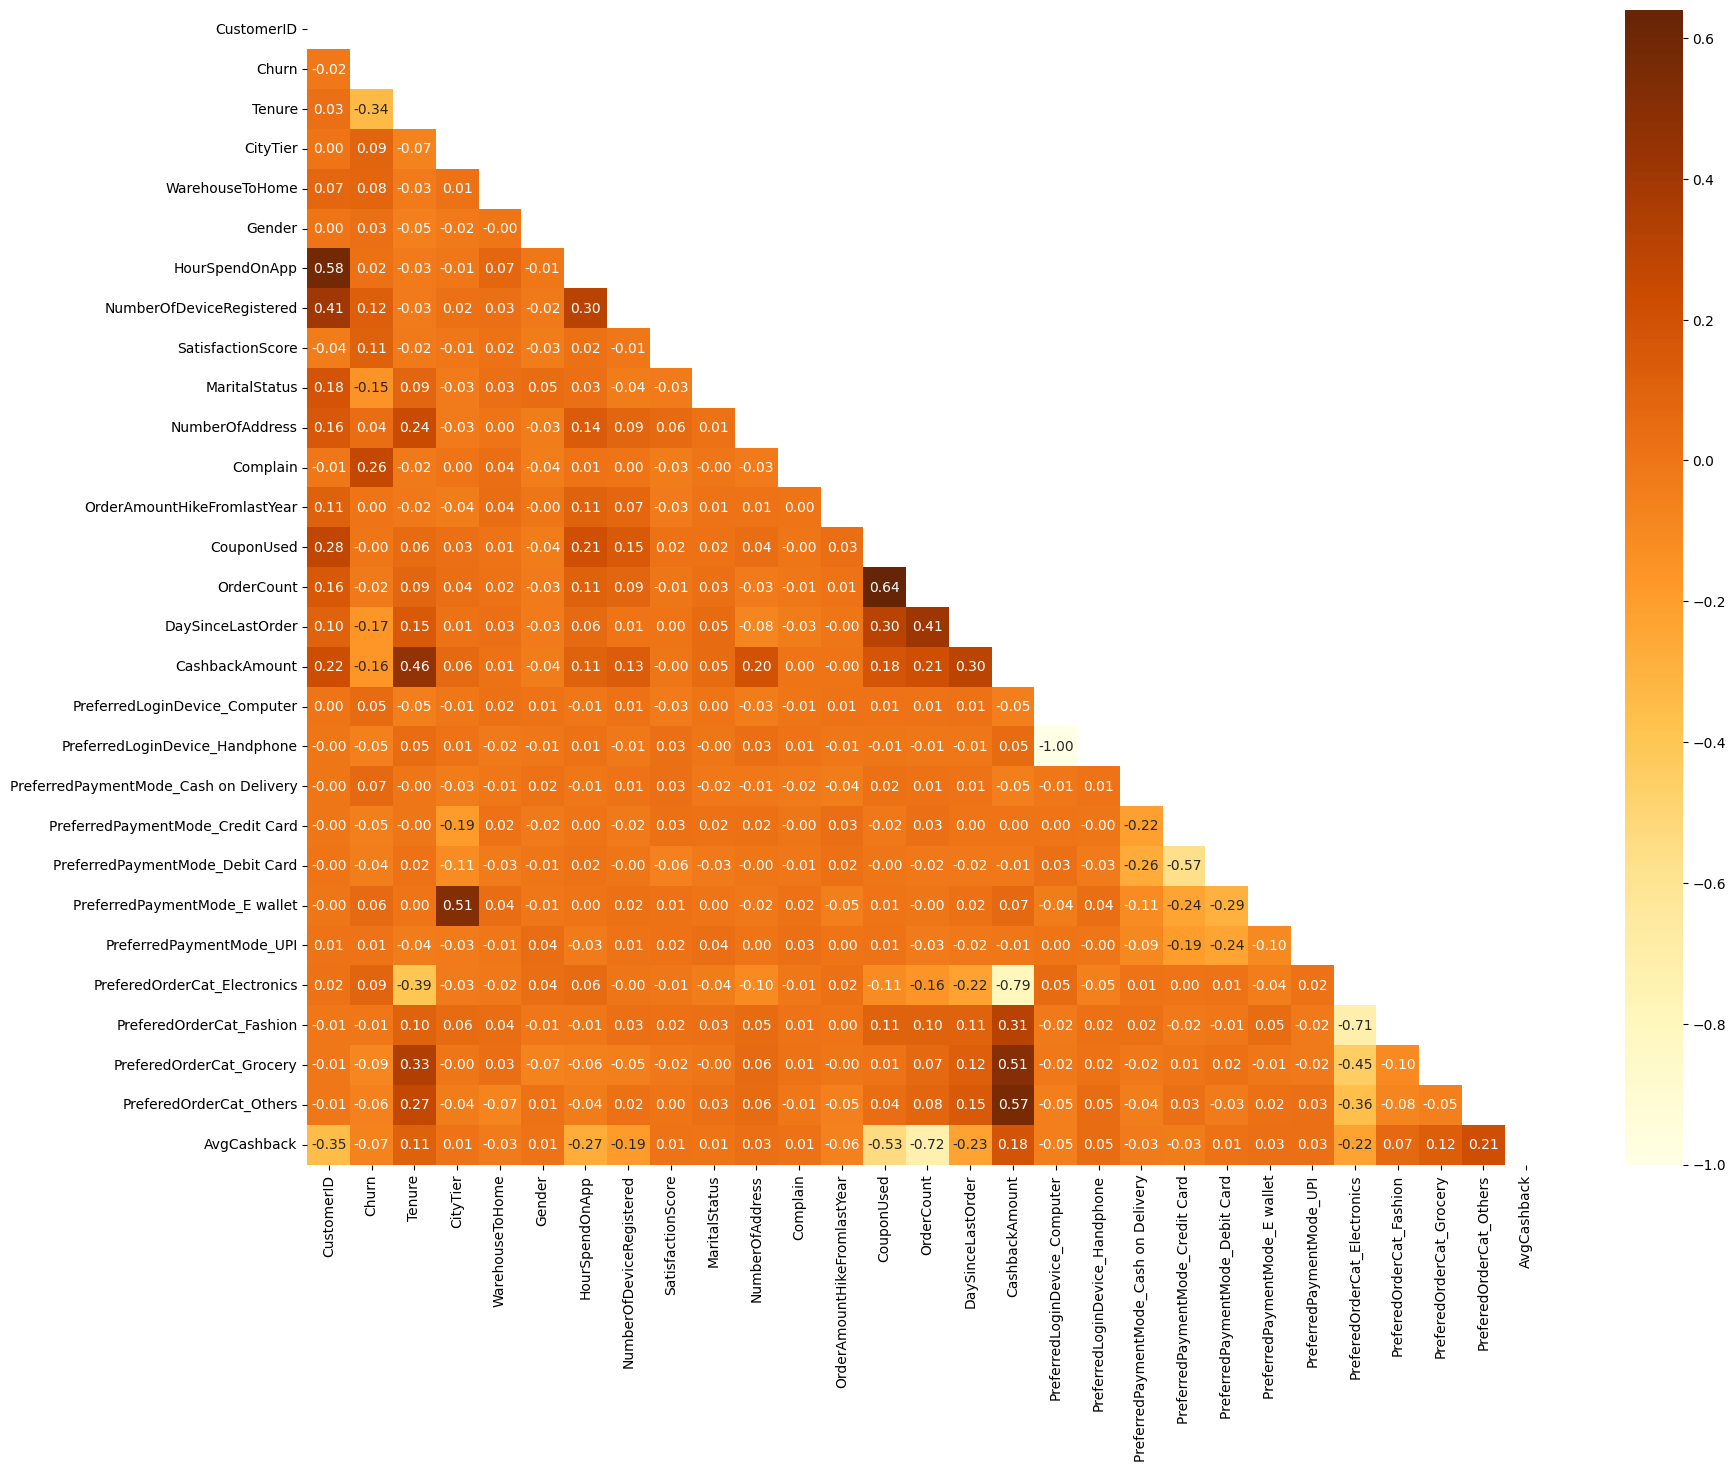

In [30]:
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.2f', cmap='YlOrBr')

In [31]:
column = []
for col in df.columns:
    if (abs(df['Churn'].corr(df[col])) > 0.05):
        column.append(col)
df_final = df[column]
df_final.sample(3)

,Churn,Tenure,CityTier,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,Complain,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Handphone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_E wallet,PreferedOrderCat_Electronics,PreferedOrderCat_Grocery,PreferedOrderCat_Others,AvgCashback
2455,1,-0.098328,-0.714335,-0.935037,-0.658056,1.409726,1,1,-1.294154,-1.157204,False,True,False,False,True,False,False,0.424110
5398,0,-1.076581,-0.714335,-0.563071,0.316639,0.684391,0,0,-0.376740,-0.357433,False,True,False,False,True,False,False,-0.380215
3843,1,-1.076581,1.474493,-0.687060,0.316639,-1.491615,0,1,-0.988349,-0.728410,True,False,False,False,True,False,False,-0.546415


## Train Test Split Data

In [32]:
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Handle Class Imbalance

In [34]:
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(4280, 17)
(4280,)
Churn
0    3526
1     754
Name: count, dtype: int64


In [35]:
X_train, y_train = over_sampling.SMOTE(random_state=10).fit_resample(X_train, y_train)

In [36]:
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(7052, 17)
(7052,)
Churn
0    3526
1    3526
Name: count, dtype: int64


# 3. Modeling

In [37]:
f2_score = make_scorer(fbeta_score, pos_label=0, beta=2)

In [38]:
def evaluation(model_str, y_pred, y_pred_train):
    results = {
        'model': model_str,
        'acc test' : accuracy_score(y_test, y_pred),
        'acc train': accuracy_score(y_train, y_pred_train),
        'prec test' : precision_score(y_test, y_pred),
        'prec train' : precision_score(y_train, y_pred_train),
        'rec test' : recall_score(y_test, y_pred),
        'rec train' : recall_score(y_train, y_pred_train),
        'f2 test': fbeta_score(y_test, y_pred, pos_label=0,  beta=2),
        'f2 train': fbeta_score(y_train, y_pred_train, pos_label=0,  beta=2)
    }
    return results

In [39]:
model_dict = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Light GBM': LGBMClassifier(),
    'XGBoost': XGBClassifier()
}

In [40]:
%%time
result_list = []
for model in model_dict:
    model_dict[model].fit(X_train, y_train)
    y_pred = model_dict[model].predict(X_test)
    y_pred_train = model_dict[model].predict(X_train)
    result = evaluation(model, y_pred, y_pred_train)
    result_list.append(result)
df_eval = pd.DataFrame(result_list)
df_eval

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3526, number of negative: 3526
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1839
[LightGBM] [Info] Number of data points in the train set: 7052, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
CPU times: total: 3.09 s
Wall time: 4.96 s


,model,acc test,acc train,prec test,prec train,rec test,rec train,f2 test,f2 train
0,Logistic Regression,0.813084,0.810125,0.432692,0.799343,0.854430,0.828134,0.834090,0.797863
1,Decision Tree,0.949533,1.000000,0.788889,1.000000,0.898734,1.000000,0.962979,1.000000
2,KNN,0.879439,0.950510,0.554717,0.912276,0.930380,0.996880,0.891534,0.921228
3,Random Forest,0.957009,1.000000,0.818182,1.000000,0.911392,1.000000,0.968736,1.000000
4,AdaBoost,0.863551,0.853942,0.524000,0.851549,0.829114,0.857345,0.887422,0.851698
5,Gradient Boosting,0.890654,0.910805,0.598086,0.913503,0.791139,0.907544,0.918164,0.912876
6,Light GBM,0.948598,0.987238,0.794286,0.982043,0.879747,0.992626,0.964121,0.983970
7,XGBoost,0.969159,0.999291,0.861272,0.998584,0.943038,1.000000,0.976898,0.998865


## Cross Validation

In [41]:
%%time
result_list = {'Model' : [], 'f2 test cv': [], 'f2 train cv': []}
for model in model_dict:
    score = cross_validate(model_dict[model], X, y, cv=5, scoring=f2_score, return_train_score=True)
    ts = score['test_score'].mean()
    tr = score['train_score'].mean()
    result_list['Model'].append(model)
    result_list['f2 test cv'].append(ts)
    result_list['f2 train cv'].append(tr)
df_eval = pd.DataFrame(result_list)
df_eval


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 729, number of negative: 3551
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 4280, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.170327 -> initscore=-1.583311
[LightGBM] [Info] Start training from score -1.583311
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 729, number of negative: 3551
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number

,Model,f2 test cv,f2 train cv
0,Logistic Regression,0.950057,0.950300
1,Decision Tree,0.988213,1.000000
2,KNN,0.963721,0.972321
3,Random Forest,0.991134,1.000000
4,AdaBoost,0.945346,0.949173
5,Gradient Boosting,0.962076,0.966923
6,Light GBM,0.981855,0.996736
7,XGBoost,0.989585,0.999865


## Hyperparameter Tuning

In [42]:
%%time
model = XGBClassifier()

params = {
    'n_estimators' : [99],
    'learning_rate' : [0.27]
}

grid = GridSearchCV(estimator=model, param_grid=params, scoring=f2_score, cv=5)

grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_pred_train = grid.predict(X_train)

result_list = []
result = evaluation('XGBoost', y_pred, y_pred_train)
result_list.append(result)
df_eval = pd.DataFrame(result_list)

print("Best score:", grid.best_score_)
print("Best parameters:", grid.best_params_)
df_eval

Best score: 0.9708363320279801
Best parameters: {'learning_rate': 0.27, 'n_estimators': 99}
CPU times: total: 953 ms
Wall time: 881 ms


,model,acc test,acc train,prec test,prec train,rec test,rec train,f2 test,f2 train
0,XGBoost,0.962617,0.998582,0.85119,0.997735,0.905063,0.999433,0.974725,0.998071


In [43]:
def draw_learning_curve(param_name, param_values):
    train_scores = []
    test_scores = []

    for value in param_values:
        param = {param_name: value}
        model = XGBClassifier(**param)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train = model.predict(X_train)
        f2_train = fbeta_score(y_train, y_pred_train, pos_label=0,  beta=2)
        train_scores.append(f2_train)

        # eval on test
        y_pred = model.predict(X_test)
        f2_test = fbeta_score(y_test, y_pred, pos_label=0,  beta=2),
        test_scores.append(f2_test)

        diff = f2_train - f2_test

        print('param value: ' + str(value) + '; train: ' + str(f2_train) + '; test: '+ str(f2_test)+ '; diff: '+ str(diff))

    fig = plt.plot(param_values, train_scores, label='Train')
    fig = plt.plot(param_values, test_scores, label='Test')
    fig = plt.xlabel('k')
    fig = plt.ylabel('f2')
    fig = plt.title('Learning Curve')
    fig = plt.legend()
    fig = plt.show()
    return fig

# param_name = 'min_child_weight'
# param_values = [int(x) for x in np.linspace(40, 100,num = 31)]
# param_values = [float(x) for x in np.linspace(0.01, 0.3,num = 30)]
# draw_learning_curve(param_name, param_values) #0.11,0.375

## Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

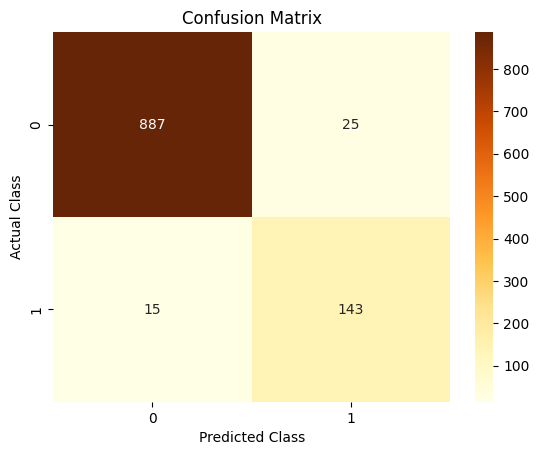

In [44]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix') # 884,28,13,145

## Feature Importance

Text(0.5, 1.0, 'feature importance score')

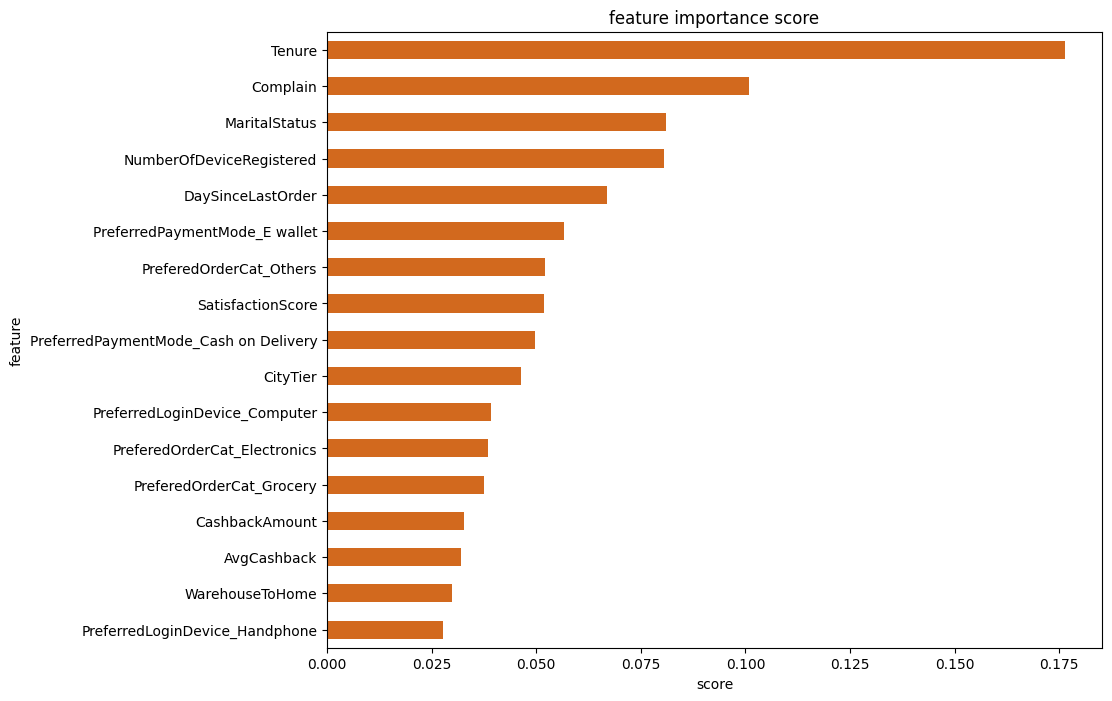

In [45]:
best_model = grid.best_estimator_
feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)

ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8), color='chocolate')
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

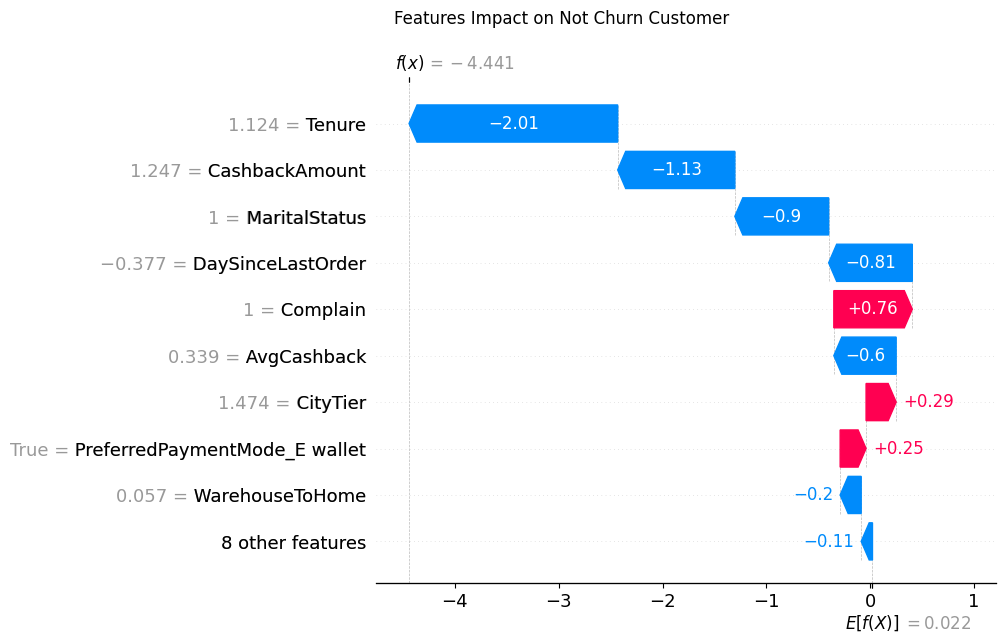

In [46]:
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

shap.plots.waterfall(shap_values[0], show=False)
plt.title('Features Impact on Not Churn Customer',x=0.3, y=1.1)
plt.show()

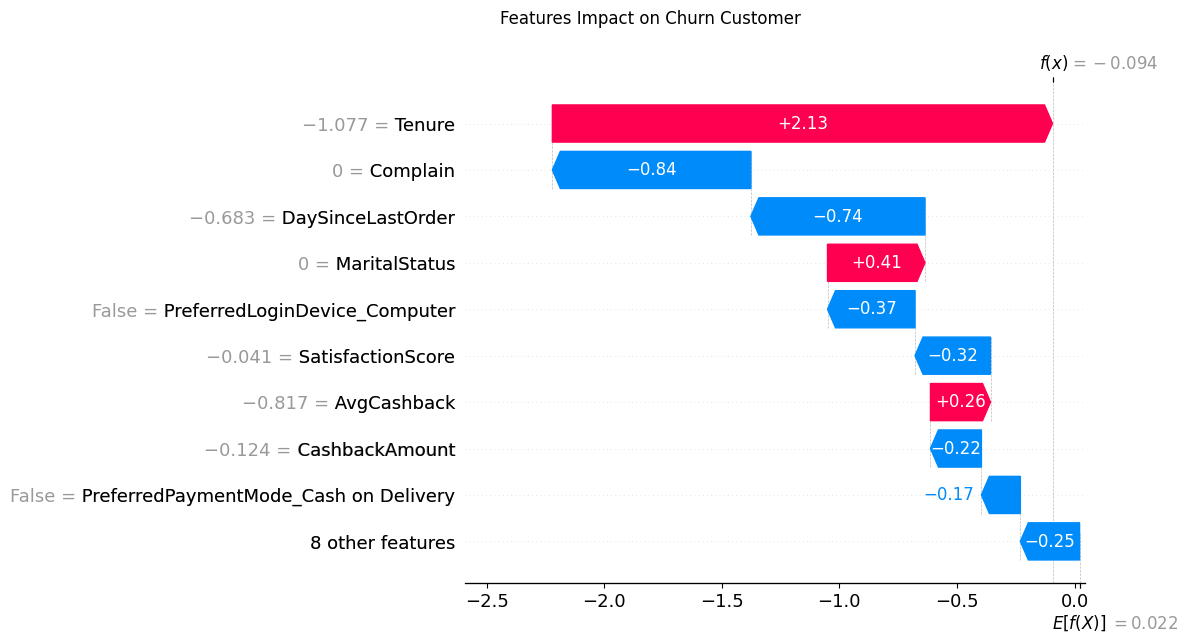

In [47]:
shap.plots.waterfall(shap_values[1], show=False)
plt.title('Features Impact on Churn Customer',x=0.3, y=1.1)
plt.show()

In [48]:
import pickle

# Save the necessary objects to a pickle file
output_data = {
    'confusion_matrix': cm,
    'feature_importances': feat_importances,
    'explainer': explainer,
    'shap_values': shap_values
}

with open('output_data.pickle', 'wb') as file:
    pickle.dump(output_data, file)
